Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Decision Tree Accuracy: 0.9853658536585366

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       20

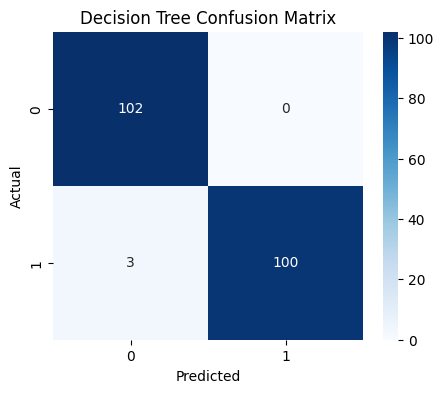

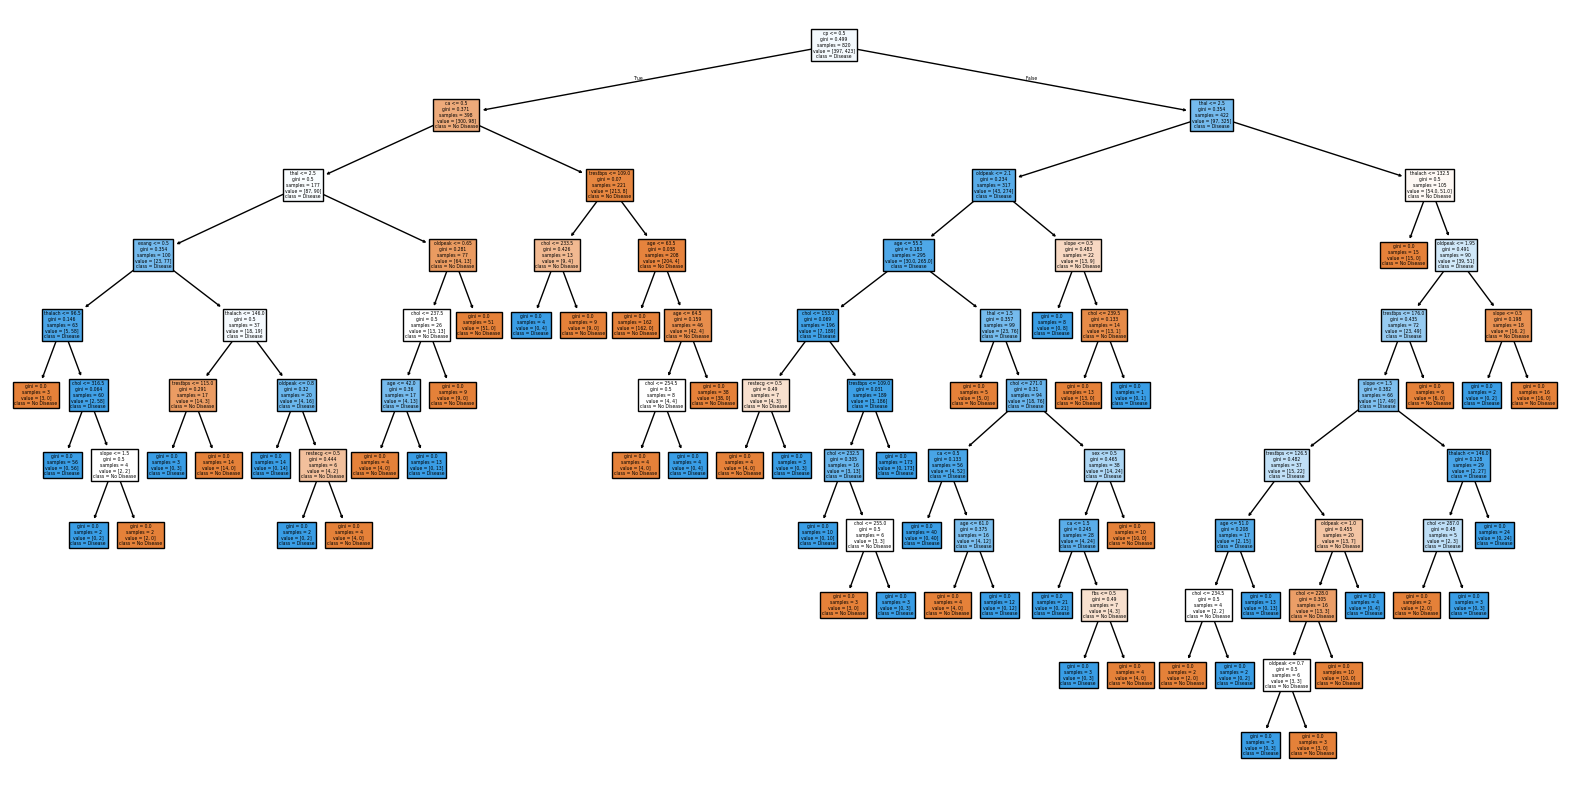


Pruned Tree Accuracy: 0.8

Random Forest Accuracy: 0.9853658536585366

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



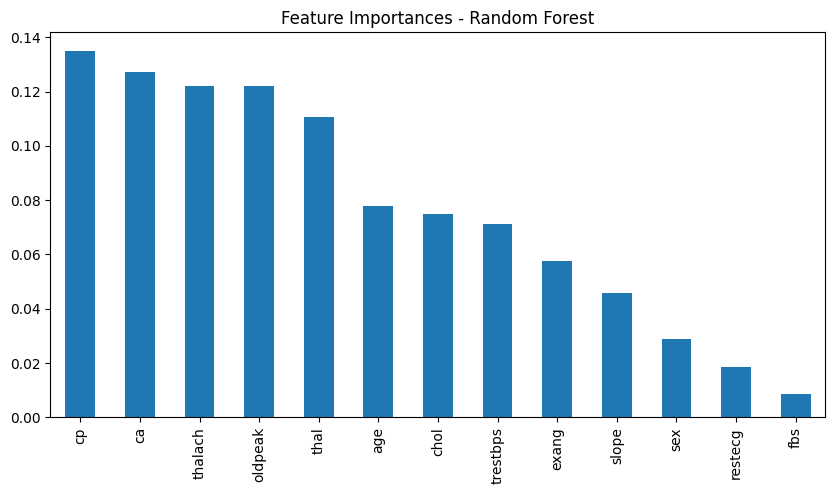


Cross-Validation Accuracy (Decision Tree): 0.8341463414634147
Cross-Validation Accuracy (Random Forest): 0.9970731707317073


In [2]:
1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load Dataset
# Make sure heart.csv is in the same directory as this notebook
df = pd.read_csv(r"C:\Users\rines\Downloads\archive (11)\heart.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# 3. Features & Target
X = df.drop('target', axis=1)
y = df['target']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Decision Tree Classifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()


# Pruned Decision Tree

tree_clf_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf_pruned.fit(X_train, y_train)
y_pred_pruned = tree_clf_pruned.predict(X_test)
print("\nPruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


# Random Forest Classifier
# 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Feature Importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
feat_importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.show()

# Cross-Validation
cv_scores_tree = cross_val_score(tree_clf_pruned, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)

print("\nCross-Validation Accuracy (Decision Tree):", np.mean(cv_scores_tree))
print("Cross-Validation Accuracy (Random Forest):", np.mean(cv_scores_rf))
